# EDA - User-Items

Nota: es importante realizar los procesos de ETL en la carpeta ./ETL/ y el de Feature Engineering en la carpeta ./Feature Engineering/ para realizar este paso.

En este archivo se desarrollará el EDA completo INDIVIDIAL para los elementos de, archivo resultante de user_items.

## Importar Librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys

# Ignorar advertencias
warnings.filterwarnings('ignore')

### importar funciones personalizadas de ../functions/EDA.py

In [3]:
# Obtener el directorio de trabajo actual
current_dir = os.getcwd()

# Navegar hacia el directorio raíz del proyecto
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Agregar la ruta del proyecto al sys.path
sys.path.append(project_root)

In [4]:
# importar función personalizada de ./VideoGameRecommender/functions/EDA.py
# Esta función permite traer el archivo en el formato que se encuentre (CSV o Parquet)
from functions.EDA import get_file, get_frequency

## Análisis Exploratorio de Datos

Se realiza el Análisis Exploratorio de Datos en user_items revisando elemento por elemento.

### Revisión general

In [5]:
# utilizamos la función get_file(file_name) importada desde ../functions/EDA.py para traer el dataset
df = get_file('user_items')

# visualizar las primeras tres filas del dataframe
df.head(3)

,user_id,items_count,item_id,playtime_forever
0,76561197970982479,277,10,6.0
1,76561197970982479,277,20,0.0
2,76561197970982479,277,30,7.0


In [6]:
# se verifican los nulos y los tipos de datos
print(df.isna().sum())
df.info()

user_id             0
items_count         0
item_id             0
playtime_forever    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   item_id           int64  
 3   playtime_forever  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 157.3+ MB


### Juegos por usuario

Text(0.5, 0, 'Cantidad de juegos')

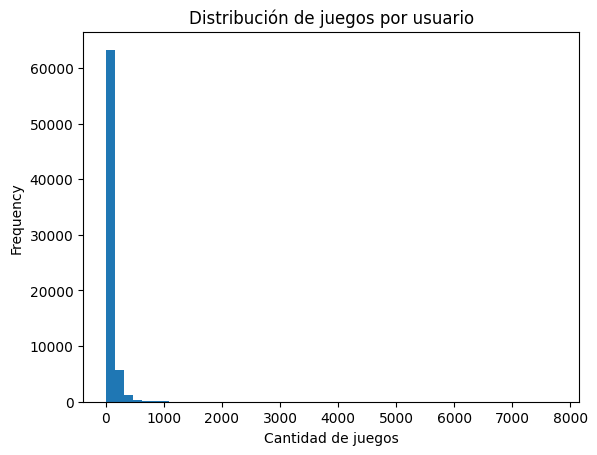

In [8]:
# contar cuántos juegos ha jugado cada usuario
games_per_user = df.groupby('user_id')['item_id'].count()

# visualizar la distribución del número de juegos por usuario POR CONTEO
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(games_per_user, bins=150, ax=ax, kde=False)
ax.set_title('Distribución del número de juegos por usuario')
ax.set_xlabel('Número de juegos')
ax.set_ylabel('Cantidad de usuarios')

In [14]:
# seleccionar únicos user_id 
uniques = df.drop_duplicates(subset='user_id')

uniques.head()

,user_id,items_count,item_id,playtime_forever
0,76561197970982479,277,10,6.0
277,js41637,888,10,0.0
1165,evcentric,137,1200,923.0
1302,Riot-Punch,328,10,0.0
1630,doctr,541,300,1131.0


In [23]:
# se utiliza la función get_frequency del archivo ../functions/EDA.py
items = df.groupby('user_id')['items_count'].count()

items.describe()

count    70912.000000
mean        72.670479
std        134.056122
min          1.000000
25%         14.000000
50%         40.000000
75%         88.000000
max       7762.000000
Name: items_count, dtype: float64

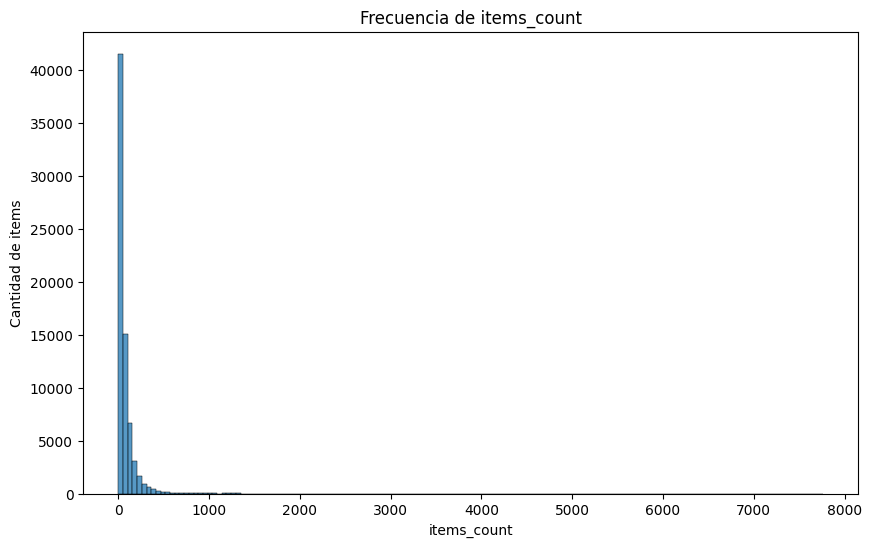

In [22]:
# graficar la frecuencia de items_count en el df uniques
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(items, bins=150, ax=ax, kde=False)
ax.set_title('Frecuencia de items_count')
ax.set_xlabel('items_count')
ax.set_ylabel('Cantidad de items')

plt.show()

### Tiempo jugado

In [25]:
# resumen estadístico
df['playtime_forever'].describe()

count    5.153209e+06
mean     9.914956e+02
std      5.418204e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.400000e+01
75%      3.550000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64

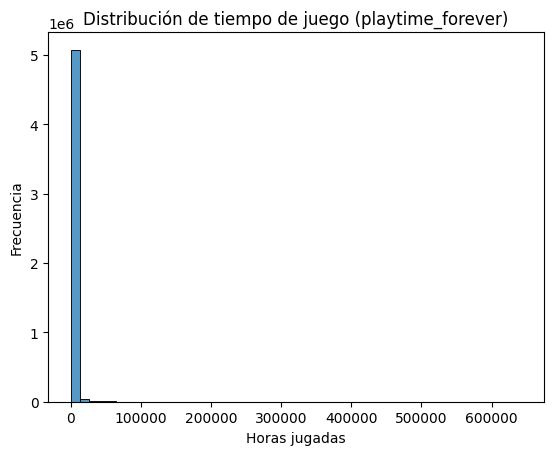

In [26]:
# Visualización de la distribución
sns.histplot(df['playtime_forever'], bins=50)
plt.title("Distribución de tiempo de juego (playtime_forever)")
plt.xlabel("Horas jugadas")
plt.ylabel("Frecuencia")
plt.show()

In [29]:
# filtrar tiempos de juego superiores a 5000
long_playtime = df[df['playtime_forever'] > 5000]

print('Cantidad de tiempos de juego superior a 5000:', len(long_playtime))
long_playtime.head()

Cantidad de tiempos de juego superior a 5000: 195483


,user_id,items_count,item_id,playtime_forever
46,76561197970982479,277,1250,10006.0
74,76561197970982479,277,24980,5001.0
81,76561197970982479,277,24960,5716.0
104,76561197970982479,277,8930,10345.0
155,76561197970982479,277,35450,14194.0


### Outliers

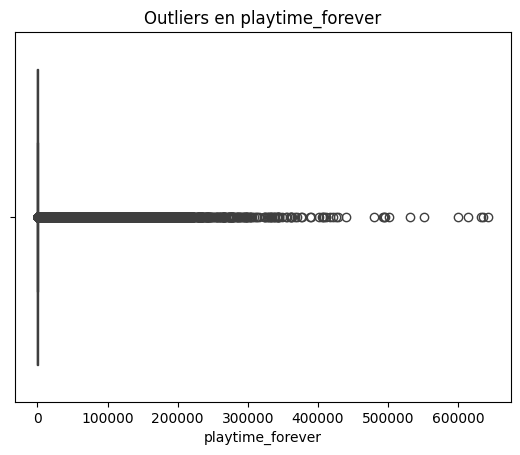

In [30]:
# Visualización de outliers en tiempo de juego
sns.boxplot(x=df['playtime_forever'])
plt.title("Outliers en playtime_forever")
plt.show()